In [39]:
pip install scipy==1.1.0


     |████████████████████████████████| 16.7MB 263kB/s eta 0:00:01     |█████████████████████████████▋  | 15.4MB 240kB/s eta 0:00:06
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1
Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install wordcloud

     |████████████████████████████████| 163kB 123kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import nltk
#import xgboost as xgb


from nltk import RegexpParser
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 

stop_words = set(stopwords.words('english')) 

from collections import Counter

import textblob
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from bs4 import BeautifulSoup

[nltk_data] Downloading package punkt to /Users/jenienam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jenienam/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
mbti_df = pd.read_csv('Resources/mbti_1.csv')
mbti_df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [6]:
# clean text in 'posts' using Beautiful Soup
#def cleaning(text):
#    text = BeautifulSoup(text, "lxml").text
#    text = re.sub(r'\|\|\|', r' ', text) 
#    text = re.sub(r'http\S+', r'<URL>', text)
#    return text

In [7]:
#Apply Beautiful Soup to the mbti_df
#mbti_df['cleaned_posts'] = mbti_df['posts'].apply(cleaning)
#mbti_df
#df = mbti_df.drop(columns="posts")

In [8]:
#count the different mbti
mbti_counts = mbti_df['type'].value_counts()
mbti_counts.head()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
Name: type, dtype: int64

In [9]:
#for where a new comment begins
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

In [10]:
#define mbti and add the description to the type to the chart
mbti = {'I':'Introvert', 'E':'Extrovert', 'N':'Intuition', 
        'S':'Sensing', 'T':'Thinking', 'F': 'Feeling', 
        'J':'Judging', 'P': 'Perceiving'}
#description of the type 
mbti_df['description'] = mbti_df['type'].apply(lambda x: ' '.join([mbti[l] for l in list(x)]))
#words per comment
mbti_df['average_words_per_comment'] = mbti_df['posts'].apply(lambda x: len(x.split())/50)
#squared totals
mbti_df['average_squared_total_words'] = mbti_df['average_words_per_comment']*2
#word count variance
mbti_df['average_word_count_variance_per_comment'] = mbti_df['posts'].apply(lambda x: var_row(x))
#interrobangs per comment = 
mbti_df['average_interrobangs_per_comment']=mbti_df['posts'].apply(lambda x: x.count('?')/50) + mbti_df['posts'].apply(lambda x: x.count('!')/50)
#preview
mbti_df.head()

,type,posts,description,average_words_per_comment,average_squared_total_words,average_word_count_variance_per_comment,average_interrobangs_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,Introvert Intuition Feeling Judging,11.12,22.24,135.2900,0.42
1,ENTP,'I'm finding the lack of me in these posts ver...,Extrovert Intuition Thinking Perceiving,23.40,46.80,187.4756,0.10
2,INTP,'Good one _____ https://www.youtube.com/wat...,Introvert Intuition Thinking Perceiving,16.72,33.44,180.6900,0.32
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",Introvert Intuition Thinking Judging,21.28,42.56,181.8324,0.28
4,ENTJ,'You're fired.|||That's another silly misconce...,Extrovert Intuition Thinking Judging,19.34,38.68,196.4576,0.22


In [11]:
#tokenize to find pars of speeches and pre-processing

posts = mbti_df["posts"]

#remove URLs 
posts_df = pd.DataFrame(data=posts)
posts_df['posts'] = posts_df['posts'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
posts_df['posts'] = posts_df['posts'].replace(r'\|\|\|', '', regex=True).replace(r'_____', '', regex=True).replace(r'@','', regex=True)


posts_df['Tokenized Posts'] = posts_df.apply(lambda row: nltk.word_tokenize(row['posts']), axis=1)
tokenized_df = pd.DataFrame(posts_df)
tokenized_df

#remove punctuations
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)
posts["Tokenized Posts"] = (strip_punctuation(str(tokenized_df["Tokenized Posts"])))



/Users/jenienam/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [44]:
#tokenization using postag 
tokenized_df["Tagged Posts PosTag"] = posts_df.apply(lambda row: nltk.pos_tag(row["Tokenized Posts"]), axis=1)
tokenized_df["type"]= mbti_df["type"]
tokenized_df

,posts,Tokenized Posts,Tagged Posts PosTag,type
0,' and intj moments sportscenter not top ten...,"[', and, intj, moments, sportscenter, not, top...","[(', POS), (and, CC), (intj, JJ), (moments, NN...",INFJ
1,'I'm finding the lack of me in these posts ver...,"[', I, 'm, finding, the, lack, of, me, in, the...","[(', POS), (I, PRP), ('m, VBP), (finding, VBG)...",ENTP
2,"'Good one course, to which I say I know; ...","['Good, one, course, ,, to, which, I, say, I, ...","[('Good, CD), (one, CD), (course, NN), (,, ,),...",INTP
3,"'Dear INTP, I enjoyed our conversation the o...","['Dear, INTP, ,, I, enjoyed, our, conversation...","[('Dear, JJ), (INTP, NNP), (,, ,), (I, PRP), (...",INTJ
4,'You're fired.That's another silly misconcepti...,"['You, 're, fired.That, 's, another, silly, mi...","[('You, POS), ('re, VBP), (fired.That, WP), ('...",ENTJ
...,...,...,...,...
8670,' just because I always think of cats as Fi do...,"[', just, because, I, always, think, of, cats,...","[(', ''), (just, RB), (because, IN), (I, PRP),...",ISFP
8671,'So...if this thread already exists someplace ...,"['So, ..., if, this, thread, already, exists, ...","[('So, NNS), (..., :), (if, IN), (this, DT), (...",ENFP
8672,'So many questions when i do these things. I ...,"['So, many, questions, when, i, do, these, thi...","[('So, RB), (many, JJ), (questions, NNS), (whe...",INTP
8673,'I am very conflicted right now when it comes ...,"[', I, am, very, conflicted, right, now, when,...","[(', POS), (I, PRP), (am, VBP), (very, RB), (c...",INFP


alternative method for word tagging below 

In [13]:
#tagged tokenization using stopwords & textblob
#tokenized = sent_tokenize(str(tokenized_df["Tokenized Posts"])) 
#for i in tokenized: 
    
#    wordsList = nltk.word_tokenize(i) 
  
    # removing stop words from wordList 
#    wordsList = [w for w in wordsList if not w in stop_words]  
  
    #  Using a Tagger. Which is part-of-speech  
    # tagger or POS-tagger.  
#    tagged = nltk.pos_tag(wordsList) 
  
#    tokenized_df["Tagged Posts Stopwords"] = posts_df.apply(lambda row: nltk.pos_tag(wordsList), axis=1)

#textblob

In [14]:
#assemble tags in lowercase dataframe with only Tagged 
Tagged_Posts_PosTag = tokenized_df["Tagged Posts PosTag"]
tags_df = pd.DataFrame(data = Tagged_Posts_PosTag)
str_tags_df = tags_df.astype(str)
#nouns
def NounCounter(tags_df):
    nouns = []
    for (word, pos) in tags_df:
        if pos.startswith("NN"):
            nouns.append(word)
    return nouns
tags_df["type"] = mbti_df["type"]
tags_df["description"] = mbti_df["description"]
tags_df["nouns"] = tags_df["Tagged Posts PosTag"].apply(NounCounter)
tags_df["noun_count"] = tags_df["nouns"].str.len()
tags_df


,Tagged Posts PosTag,type,description,nouns,noun_count
0,"[(', POS), (and, CC), (intj, JJ), (moments, NN...",INFJ,Introvert Intuition Feeling Judging,"[moments, ten, plays, experience, life, repeat...",161
1,"[(', POS), (I, PRP), ('m, VBP), (finding, VBG)...",ENTP,Extrovert Intuition Thinking Perceiving,"[lack, posts, position, example, girlfriend, e...",255
2,"[('Good, CD), (one, CD), (course, NN), (,, ,),...",INTP,Introvert Intuition Thinking Perceiving,"[course, blessing, curse.Does, friend, couple,...",179
3,"[('Dear, JJ), (INTP, NNP), (,, ,), (I, PRP), (...",INTJ,Introvert Intuition Thinking Judging,"[INTP, conversation, day, Esoteric, nature, un...",227
4,"[('You, POS), ('re, VBP), (fired.That, WP), ('...",ENTJ,Extrovert Intuition Thinking Judging,"[misconception, key, whatever, Nobody, BS, guy...",225
...,...,...,...,...,...
8670,"[(', ''), (just, RB), (because, IN), (I, PRP),...",ISFP,Introvert Sensing Feeling Perceiving,"[cats, Fi, doms, reason, websites, haven, nazi...",178
8671,"[('So, NNS), (..., :), (if, IN), (this, DT), (...",ENFP,Extrovert Intuition Feeling Perceiving,"['So, thread, someplace, heck, Ooops, Movies, ...",296
8672,"[('So, RB), (many, JJ), (questions, NNS), (whe...",INTP,Introvert Intuition Thinking Perceiving,"[questions, i, things, purple, pill, Pick, lot...",247
8673,"[(', POS), (I, PRP), (am, VBP), (very, RB), (c...",INFP,Introvert Intuition Feeling Perceiving,"[right, children, instinct, none, friends, chi...",306


In [15]:
#adjectives
def AdjectiveCounter(tags_df):
    adjectives = []
    for (word, pos) in tags_df:
        if pos.startswith("JJ"):
            adjectives.append(word)
    return adjectives
tags_df["adjectives"] = tags_df["Tagged Posts PosTag"].apply(AdjectiveCounter)
tags_df["adjectives_count"] = tags_df["adjectives"].str.len()

tags_df

,Tagged Posts PosTag,type,description,nouns,noun_count,adjectives,adjectives_count
0,"[(', POS), (and, CC), (intj, JJ), (moments, NN...",INFJ,Introvert Intuition Feeling Judging,"[moments, ten, plays, experience, life, repeat...",161,"[intj, life-changing, most, last, next, natura...",51
1,"[(', POS), (I, PRP), ('m, VBP), (finding, VBG)...",ENTP,Extrovert Intuition Thinking Perceiving,"[lack, posts, position, example, girlfriend, e...",255,"[same, missionary, new, theory.Hello, most, sm...",96
2,"[('Good, CD), (one, CD), (course, NN), (,, ,),...",INTP,Introvert Intuition Thinking Perceiving,"[course, blessing, curse.Does, friend, couple,...",179,"[positive, best, amazing, more, So-called, Ti-...",82
3,"[('Dear, JJ), (INTP, NNP), (,, ,), (I, PRP), (...",INTJ,Introvert Intuition Thinking Judging,"[INTP, conversation, day, Esoteric, nature, un...",227,"['Dear, other, social, arbitrary, other, deep,...",93
4,"[('You, POS), ('re, VBP), (fired.That, WP), ('...",ENTJ,Extrovert Intuition Thinking Judging,"[misconception, key, whatever, Nobody, BS, guy...",225,"[silly, super-duper-long-ass, permanent, vacat...",87
...,...,...,...,...,...,...,...
8670,"[(', ''), (just, RB), (because, IN), (I, PRP),...",ISFP,Introvert Sensing Feeling Perceiving,"[cats, Fi, doms, reason, websites, haven, nazi...",178,"[neo, such, such, much, political, real, likel...",73
8671,"[('So, NNS), (..., :), (if, IN), (this, DT), (...",ENFP,Extrovert Intuition Feeling Perceiving,"['So, thread, someplace, heck, Ooops, Movies, ...",296,"[hard, up., hilarious, whole, dark, afraid, fu...",82
8672,"[('So, RB), (many, JJ), (questions, NNS), (whe...",INTP,Introvert Intuition Thinking Perceiving,"[questions, i, things, purple, pill, Pick, lot...",247,"[many, familiar, local, favorite, local.I, gre...",68
8673,"[(', POS), (I, PRP), (am, VBP), (very, RB), (c...",INFP,Introvert Intuition Feeling Perceiving,"[right, children, instinct, none, friends, chi...",306,"[conflicted, maternal, close, closest, correct...",113


In [16]:
#verbs
def VerbCounter(tags_df):
    verbs = []
    for (word, pos) in tags_df:
        if pos.startswith("V"):
            verbs.append(word)
    return verbs
tags_df["verbs"] = tags_df["Tagged Posts PosTag"].apply(VerbCounter)
tags_df["verb_count"] = tags_df["verbs"].str.len()
tags_df

,Tagged Posts PosTag,type,description,nouns,noun_count,adjectives,adjectives_count,verbs,verb_count
0,"[(', POS), (and, CC), (intj, JJ), (moments, NN...",INFJ,Introvert Intuition Feeling Judging,"[moments, ten, plays, experience, life, repeat...",161,"[intj, life-changing, most, last, next, natura...",51,"[top, has, been, posted, committing, hear, 's,...",90
1,"[(', POS), (I, PRP), ('m, VBP), (finding, VBG)...",ENTP,Extrovert Intuition Thinking Perceiving,"[lack, posts, position, example, girlfriend, e...",255,"[same, missionary, new, theory.Hello, most, sm...",96,"['m, finding, be, boring, 's, are, have, use, ...",257
2,"[('Good, CD), (one, CD), (course, NN), (,, ,),...",INTP,Introvert Intuition Thinking Perceiving,"[course, blessing, curse.Does, friend, couple,...",179,"[positive, best, amazing, more, So-called, Ti-...",82,"[say, know, 's, being, be, 's, be, reconciled,...",166
3,"[('Dear, JJ), (INTP, NNP), (,, ,), (I, PRP), (...",INTJ,Introvert Intuition Thinking Judging,"[INTP, conversation, day, Esoteric, nature, un...",227,"['Dear, other, social, arbitrary, other, deep,...",93,"[enjoyed, gabbing, being, created, hurt, want,...",233
4,"[('You, POS), ('re, VBP), (fired.That, WP), ('...",ENTJ,Extrovert Intuition Thinking Judging,"[misconception, key, whatever, Nobody, BS, guy...",225,"[silly, super-duper-long-ass, permanent, vacat...",87,"['re, 's, approaching, is, is, going, be, unlo...",229
...,...,...,...,...,...,...,...,...,...
8670,"[(', ''), (just, RB), (because, IN), (I, PRP),...",ISFP,Introvert Sensing Feeling Perceiving,"[cats, Fi, doms, reason, websites, haven, nazi...",178,"[neo, such, such, much, political, real, likel...",73,"[think, have, become, 'm, 've, been, learning,...",187
8671,"[('So, NNS), (..., :), (if, IN), (this, DT), (...",ENFP,Extrovert Intuition Feeling Perceiving,"['So, thread, someplace, heck, Ooops, Movies, ...",296,"[hard, up., hilarious, whole, dark, afraid, fu...",82,"[exists, does, delete, guess, did, look, start...",332
8672,"[('So, RB), (many, JJ), (questions, NNS), (whe...",INTP,Introvert Intuition Thinking Perceiving,"[questions, i, things, purple, pill, Pick, lot...",247,"[many, familiar, local, favorite, local.I, gre...",68,"[do, take, winning, Do, want.I, worked, dont, ...",203
8673,"[(', POS), (I, PRP), (am, VBP), (very, RB), (c...",INFP,Introvert Intuition Feeling Perceiving,"[right, children, instinct, none, friends, chi...",306,"[conflicted, maternal, close, closest, correct...",113,"[am, comes, wanting, had, have, had, had, gues...",387


In [17]:
#Determiners
def DeterminerCounter(tags_df):
    determiners = []
    for (word, pos) in tags_df:
        if pos.startswith("DT"):
            determiners.append(word)
    return determiners
tags_df["determiners"] = tags_df["Tagged Posts PosTag"].apply(DeterminerCounter)
tags_df["determiner_count"] = tags_df["determiners"].str.len()
tags_df

,Tagged Posts PosTag,type,description,nouns,noun_count,adjectives,adjectives_count,verbs,verb_count,determiners,determiner_count
0,"[(', POS), (and, CC), (intj, JJ), (moments, NN...",INFJ,Introvert Intuition Feeling Judging,"[moments, ten, plays, experience, life, repeat...",161,"[intj, life-changing, most, last, next, natura...",51,"[top, has, been, posted, committing, hear, 's,...",90,"[the, the, the, a, the, every, the, a, each, e...",52
1,"[(', POS), (I, PRP), ('m, VBP), (finding, VBG)...",ENTP,Extrovert Intuition Thinking Perceiving,"[lack, posts, position, example, girlfriend, e...",255,"[same, missionary, new, theory.Hello, most, sm...",96,"['m, finding, be, boring, 's, are, have, use, ...",257,"[the, these, the, an, all, the, the, this, the...",90
2,"[('Good, CD), (one, CD), (course, NN), (,, ,),...",INTP,Introvert Intuition Thinking Perceiving,"[course, blessing, curse.Does, friend, couple,...",179,"[positive, best, amazing, more, So-called, Ti-...",82,"[say, know, 's, being, be, 's, be, reconciled,...",166,"[that, an, a, any, All, the, that, The, No, an...",52
3,"[('Dear, JJ), (INTP, NNP), (,, ,), (I, PRP), (...",INTJ,Introvert Intuition Thinking Judging,"[INTP, conversation, day, Esoteric, nature, un...",227,"['Dear, other, social, arbitrary, other, deep,...",93,"[enjoyed, gabbing, being, created, hurt, want,...",233,"[the, the, the, the, every, no, All, no, a, ei...",94
4,"[('You, POS), ('re, VBP), (fired.That, WP), ('...",ENTJ,Extrovert Intuition Thinking Judging,"[misconception, key, whatever, Nobody, BS, guy...",225,"[silly, super-duper-long-ass, permanent, vacat...",87,"['re, 's, approaching, is, is, going, be, unlo...",229,"[another, the, a, the, that, that, a, an, any,...",84
...,...,...,...,...,...,...,...,...,...,...,...
8670,"[(', ''), (just, RB), (because, IN), (I, PRP),...",ISFP,Introvert Sensing Feeling Perceiving,"[cats, Fi, doms, reason, websites, haven, nazi...",178,"[neo, such, such, much, political, real, likel...",73,"[think, have, become, 'm, 've, been, learning,...",187,"[some, a, a, the, this, this, the, both, a, th...",70
8671,"[('So, NNS), (..., :), (if, IN), (this, DT), (...",ENFP,Extrovert Intuition Feeling Perceiving,"['So, thread, someplace, heck, Ooops, Movies, ...",296,"[hard, up., hilarious, whole, dark, afraid, fu...",82,"[exists, does, delete, guess, did, look, start...",332,"[this, the, this, a, every, this, the, An, Thi...",94
8672,"[('So, RB), (many, JJ), (questions, NNS), (whe...",INTP,Introvert Intuition Thinking Perceiving,"[questions, i, things, purple, pill, Pick, lot...",247,"[many, familiar, local, favorite, local.I, gre...",68,"[do, take, winning, Do, want.I, worked, dont, ...",203,"[these, the, a, a, the, all, the, the, The, th...",84
8673,"[(', POS), (I, PRP), (am, VBP), (very, RB), (c...",INFP,Introvert Intuition Feeling Perceiving,"[right, children, instinct, none, friends, chi...",306,"[conflicted, maternal, close, closest, correct...",113,"[am, comes, wanting, had, have, had, had, gues...",387,"[no, this, the, the, a, this, a, a, a, the, an...",140


In [18]:
#interjections
def InterjectionCounter(tags_df):
    interjections = []
    for (word, pos) in tags_df:
        if pos.startswith("UH"):
            interjections.append(word)
    return interjections
tags_df["interjections"] = tags_df["Tagged Posts PosTag"].apply(InterjectionCounter)
tags_df["interjections_count"] = tags_df["interjections"].str.len()
tags_df

,Tagged Posts PosTag,type,description,nouns,noun_count,adjectives,adjectives_count,verbs,verb_count,determiners,determiner_count,interjections,interjections_count
0,"[(', POS), (and, CC), (intj, JJ), (moments, NN...",INFJ,Introvert Intuition Feeling Judging,"[moments, ten, plays, experience, life, repeat...",161,"[intj, life-changing, most, last, next, natura...",51,"[top, has, been, posted, committing, hear, 's,...",90,"[the, the, the, a, the, every, the, a, each, e...",52,[],0
1,"[(', POS), (I, PRP), ('m, VBP), (finding, VBG)...",ENTP,Extrovert Intuition Thinking Perceiving,"[lack, posts, position, example, girlfriend, e...",255,"[same, missionary, new, theory.Hello, most, sm...",96,"['m, finding, be, boring, 's, are, have, use, ...",257,"[the, these, the, an, all, the, the, this, the...",90,[],0
2,"[('Good, CD), (one, CD), (course, NN), (,, ,),...",INTP,Introvert Intuition Thinking Perceiving,"[course, blessing, curse.Does, friend, couple,...",179,"[positive, best, amazing, more, So-called, Ti-...",82,"[say, know, 's, being, be, 's, be, reconciled,...",166,"[that, an, a, any, All, the, that, The, No, an...",52,"[yes, No, Oh, Yessss, Oh]",5
3,"[('Dear, JJ), (INTP, NNP), (,, ,), (I, PRP), (...",INTJ,Introvert Intuition Thinking Judging,"[INTP, conversation, day, Esoteric, nature, un...",227,"['Dear, other, social, arbitrary, other, deep,...",93,"[enjoyed, gabbing, being, created, hurt, want,...",233,"[the, the, the, the, every, no, All, no, a, ei...",94,[],0
4,"[('You, POS), ('re, VBP), (fired.That, WP), ('...",ENTJ,Extrovert Intuition Thinking Judging,"[misconception, key, whatever, Nobody, BS, guy...",225,"[silly, super-duper-long-ass, permanent, vacat...",87,"['re, 's, approaching, is, is, going, be, unlo...",229,"[another, the, a, the, that, that, a, an, any,...",84,"[Oh, Yes]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,"[(', ''), (just, RB), (because, IN), (I, PRP),...",ISFP,Introvert Sensing Feeling Perceiving,"[cats, Fi, doms, reason, websites, haven, nazi...",178,"[neo, such, such, much, political, real, likel...",73,"[think, have, become, 'm, 've, been, learning,...",187,"[some, a, a, the, this, this, the, both, a, th...",70,[Oh],1
8671,"[('So, NNS), (..., :), (if, IN), (this, DT), (...",ENFP,Extrovert Intuition Feeling Perceiving,"['So, thread, someplace, heck, Ooops, Movies, ...",296,"[hard, up., hilarious, whole, dark, afraid, fu...",82,"[exists, does, delete, guess, did, look, start...",332,"[this, the, this, a, every, this, the, An, Thi...",94,"[WOOO, Yeah, Yeah]",3
8672,"[('So, RB), (many, JJ), (questions, NNS), (whe...",INTP,Introvert Intuition Thinking Perceiving,"[questions, i, things, purple, pill, Pick, lot...",247,"[many, familiar, local, favorite, local.I, gre...",68,"[do, take, winning, Do, want.I, worked, dont, ...",203,"[these, the, a, a, the, all, the, the, The, th...",84,[No],1
8673,"[(', POS), (I, PRP), (am, VBP), (very, RB), (c...",INFP,Introvert Intuition Feeling Perceiving,"[right, children, instinct, none, friends, chi...",306,"[conflicted, maternal, close, closest, correct...",113,"[am, comes, wanting, had, have, had, had, gues...",387,"[no, this, the, the, a, this, a, a, a, the, an...",140,"[yeah, Oh, Yeah, Yeah]",4


In [19]:
#prepositions
def PrepositionCounter(tags_df):
    prepositions = []
    for (word, pos) in tags_df:
        if pos.startswith("IN"):
            prepositions.append(word)
    return prepositions
tags_df["prepositions"] = tags_df["Tagged Posts PosTag"].apply(PrepositionCounter)
tags_df["preposition_count"] = tags_df["prepositions"].str.len()
tags_df = tags_df.rename(columns={'adjectives_count': 'adjective_count', 'interjections_count': 'interjection_count'})
tags_df

,Tagged Posts PosTag,type,description,nouns,noun_count,adjectives,adjective_count,verbs,verb_count,determiners,determiner_count,interjections,interjection_count,prepositions,preposition_count
0,"[(', POS), (and, CC), (intj, JJ), (moments, NN...",INFJ,Introvert Intuition Feeling Judging,"[moments, ten, plays, experience, life, repeat...",161,"[intj, life-changing, most, last, next, natura...",51,"[top, has, been, posted, committing, hear, 's,...",90,"[the, the, the, a, the, every, the, a, each, e...",52,[],0,"[in, On, for, of, on, before, in, of, for, in,...",78
1,"[(', POS), (I, PRP), ('m, VBP), (finding, VBG)...",ENTP,Extrovert Intuition Thinking Perceiving,"[lack, posts, position, example, girlfriend, e...",255,"[same, missionary, new, theory.Hello, most, sm...",96,"['m, finding, be, boring, 's, are, have, use, ...",257,"[the, these, the, an, all, the, the, this, the...",90,[],0,"[of, in, if, in, For, in, Than, of, while, wit...",136
2,"[('Good, CD), (one, CD), (course, NN), (,, ,),...",INTP,Introvert Intuition Thinking Perceiving,"[course, blessing, curse.Does, friend, couple,...",179,"[positive, best, amazing, more, So-called, Ti-...",82,"[say, know, 's, being, be, 's, be, reconciled,...",166,"[that, an, a, any, All, the, that, The, No, an...",52,"[yes, No, Oh, Yessss, Oh]",5,"[that, If, than, in, in, at, for, from, like, ...",91
3,"[('Dear, JJ), (INTP, NNP), (,, ,), (I, PRP), (...",INTJ,Introvert Intuition Thinking Judging,"[INTP, conversation, day, Esoteric, nature, un...",227,"['Dear, other, social, arbitrary, other, deep,...",93,"[enjoyed, gabbing, being, created, hurt, want,...",233,"[the, the, the, the, every, no, All, no, a, ei...",94,[],0,"[about, of, of, in, on, like, in, though, in, ...",124
4,"[('You, POS), ('re, VBP), (fired.That, WP), ('...",ENTJ,Extrovert Intuition Thinking Judging,"[misconception, key, whatever, Nobody, BS, guy...",225,"[silly, super-duper-long-ass, permanent, vacat...",87,"['re, 's, approaching, is, is, going, be, unlo...",229,"[another, the, a, the, that, that, a, an, any,...",84,"[Oh, Yes]",2,"[That, with, on, on, about, If, for, like, ove...",84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,"[(', ''), (just, RB), (because, IN), (I, PRP),...",ISFP,Introvert Sensing Feeling Perceiving,"[cats, Fi, doms, reason, websites, haven, nazi...",178,"[neo, such, such, much, political, real, likel...",73,"[think, have, become, 'm, 've, been, learning,...",187,"[some, a, a, the, this, this, the, both, a, th...",70,[Oh],1,"[because, of, as, for, on, for, as, on, becaus...",96
8671,"[('So, NNS), (..., :), (if, IN), (this, DT), (...",ENFP,Extrovert Intuition Feeling Perceiving,"['So, thread, someplace, heck, Ooops, Movies, ...",296,"[hard, up., hilarious, whole, dark, afraid, fu...",82,"[exists, does, delete, guess, did, look, start...",332,"[this, the, this, a, every, this, the, An, Thi...",94,"[WOOO, Yeah, Yeah]",3,"[if, because, in, of, with, that, that, over, ...",117
8672,"[('So, RB), (many, JJ), (questions, NNS), (whe...",INTP,Introvert Intuition Thinking Perceiving,"[questions, i, things, purple, pill, Pick, lot...",247,"[many, familiar, local, favorite, local.I, gre...",68,"[do, take, winning, Do, want.I, worked, dont, ...",203,"[these, the, a, a, the, all, the, the, The, th...",84,[No],1,"[in, for, if, with, at, of, of, of, of, from, ...",89
8673,"[(', POS), (I, PRP), (am, VBP), (very, RB), (c...",INFP,Introvert Intuition Feeling Perceiving,"[right, children, instinct, none, friends, chi...",306,"[conflicted, maternal, close, closest, correct...",113,"[am, comes, wanting, had, have, had, had, gues...",387,"[no, this, the, the, a, this, a, a, a, the, an...",140,"[yeah, Oh, Yeah, Yeah]",4,"[until, Up, until, of, If, for, if, because, i...",222


In [20]:
#parts of speech data frame
types = tags_df["type"]
parts_of_speech_df = pd.DataFrame(data = types)
parts_of_speech_df["noun_count"] = tags_df["noun_count"]
parts_of_speech_df["adjective_count"] = tags_df["adjective_count"]
parts_of_speech_df["verb_count"] = tags_df["verb_count"]
parts_of_speech_df["determiner_count"] = tags_df["determiner_count"]
parts_of_speech_df["interjection_count"] = tags_df["interjection_count"]
parts_of_speech_df["preposition_count"] = tags_df["preposition_count"]

In [21]:
parts_of_speech_df.to_csv("parts_of_speech.csv")
tags_df.to_csv("mbti_data_full.csv")
tokenized_df.to_csv("tokenized_data.csv")

In [22]:
#visualizations

VISUALIZATIONS

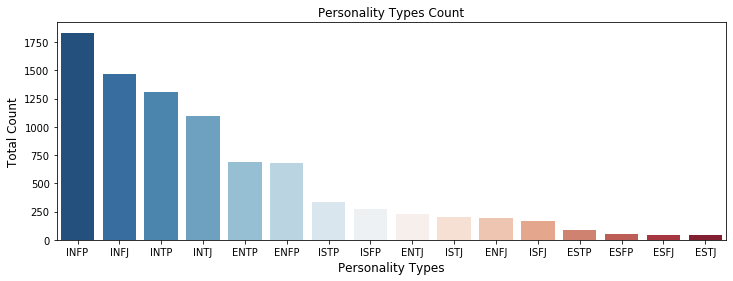

In [23]:
#see the different types of mbti and create a bar graph of counts 
plt.figure(figsize=(12,4))
count = mbti_df['type'].value_counts()
df_counts = sns.barplot(count.index, count.values, data=mbti_df, palette= "RdBu_r")
plt.ylabel('Total Count', fontsize=12)
plt.xlabel('Personality Types', fontsize=12)
plt.title("Personality Types Count")
plt.savefig('mbti_types.png') 

In [24]:
#comparison bar charts based on personality types 
#created new data frame with types 
split_types = mbti_df["description"].str.split(" ")
type_data = split_types.tolist()
types = ["I_vs_E", "N_vs_S", "F_vs_T", "J_vs_P"]
new_type_data = pd.DataFrame(type_data, columns=types)
new_type_data.head()

,I_vs_E,N_vs_S,F_vs_T,J_vs_P
0,Introvert,Intuition,Feeling,Judging
1,Extrovert,Intuition,Thinking,Perceiving
2,Introvert,Intuition,Thinking,Perceiving
3,Introvert,Intuition,Thinking,Judging
4,Extrovert,Intuition,Thinking,Judging


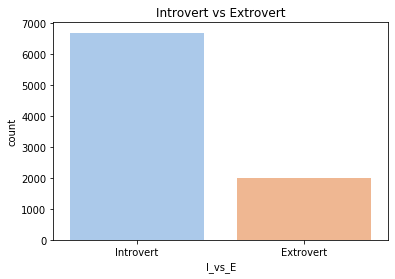

In [25]:
#bar charts for individual personality types 
#introvert vs. extrovert
I_E = sns.countplot(x="I_vs_E", data=new_type_data, linewidth=5, palette="pastel")
plt.title("Introvert vs Extrovert")
plt.savefig("I_vs_E.png")

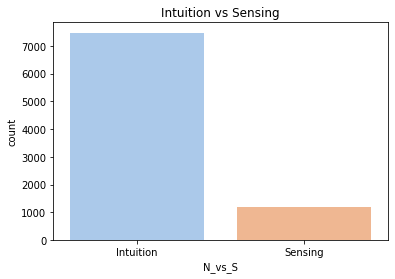

In [26]:
#Intuition vs. Sensing
N_S = sns.countplot(x="N_vs_S", data=new_type_data, linewidth=5, palette="pastel")
plt.title("Intuition vs Sensing")
plt.savefig("N_vs_S.png")

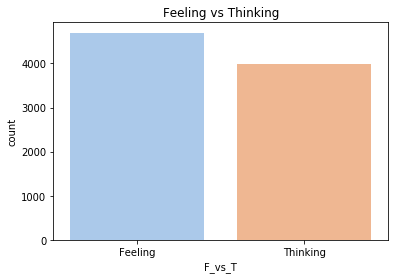

In [27]:
#Feeling vs. Thinking
F_T = sns.countplot(x="F_vs_T", data=new_type_data, linewidth=5, palette="pastel")
plt.title("Feeling vs Thinking")
plt.savefig("F_vs_T.png")

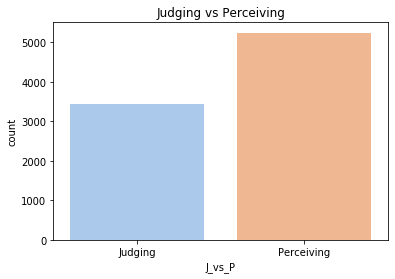

In [28]:
#Judging vs. Perceiving
J_P = sns.countplot(x="J_vs_P", data=new_type_data, linewidth=5, palette="pastel")
plt.title("Judging vs Perceiving")
plt.savefig("J_vs_P.png")

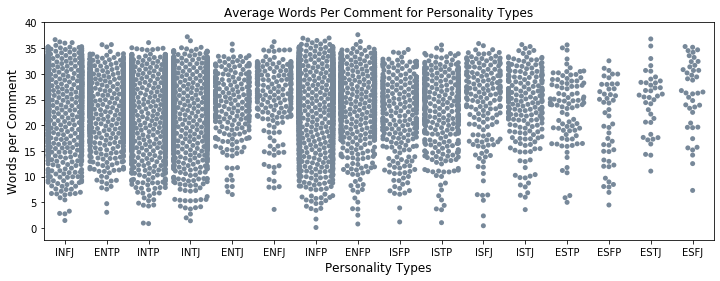

In [29]:
#words per chart
plt.figure(figsize=(12,4))
sns.swarmplot(x= mbti_df["type"], y=mbti_df['average_words_per_comment'], color= "lightslategrey") # Set color paletteplt.ylabel('Total Count', fontsize=12)
plt.xlabel('Personality Types', fontsize=12)
plt.ylabel('Words per Comment', fontsize=12)
plt.title("Average Words Per Comment for Personality Types")
plt.savefig("average_words_per_comment")

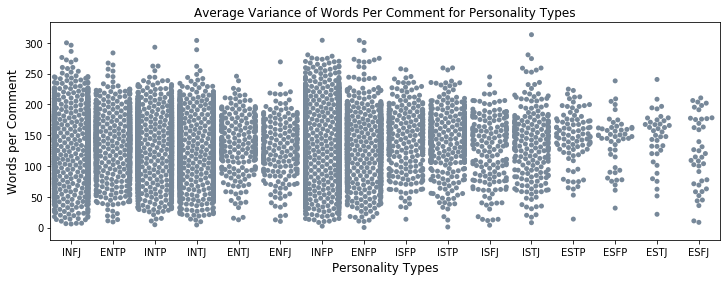

In [76]:
plt.figure(figsize=(12,4))
sns.swarmplot(x= mbti_df["type"], y=mbti_df['average_word_count_variance_per_comment'], color= "lightslategrey") # Set color paletteplt.ylabel('Total Count', fontsize=12)
plt.xlabel('Personality Types', fontsize=12)
plt.ylabel('Words per Comment', fontsize=12)
plt.title("Average Variance of Words Per Comment for Personality Types")
plt.savefig("average_variance_per_comment")

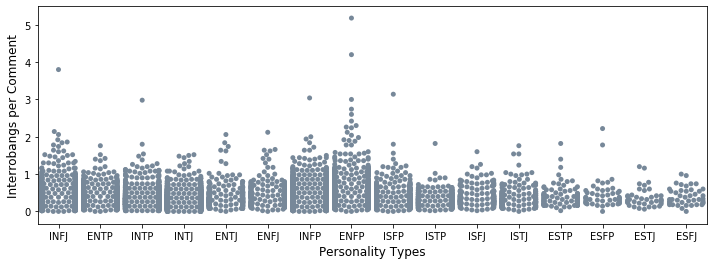

In [30]:
#interrobangs_per_comment
plt.figure(figsize=(12,4))
sns.swarmplot(x= mbti_df["type"], y=mbti_df['average_interrobangs_per_comment'], color= "lightslategrey") 
plt.xlabel('Personality Types', fontsize=12)
plt.ylabel('Interrobangs per Comment', fontsize=12)
plt.savefig("interrobangs_per_comment.png")

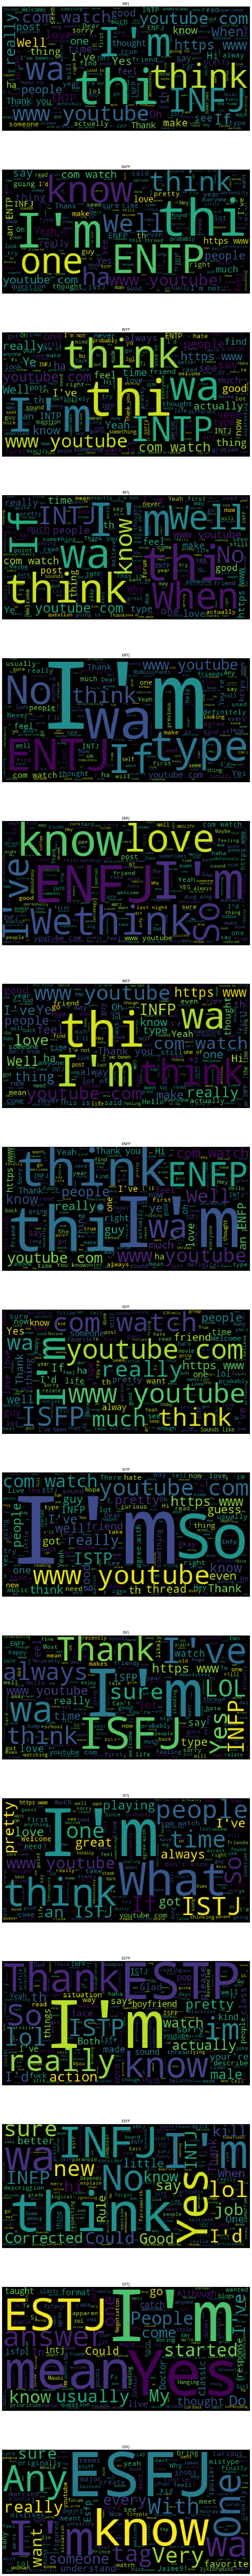

In [77]:
from scipy.misc.pilutil import imread
from wordcloud import WordCloud, STOPWORDS



fig, ax = plt.subplots(len(mbti_df['type'].unique()), sharex=True, figsize=(15,10*len(mbti_df['type'].unique())))

k = 0
for i in mbti_df['type'].unique():
    df = mbti_df[mbti_df['type'] == i]
    wordcloud = WordCloud().generate(df['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1
    plt.savefig("wordclouds.png")